In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
# shape 확인, 3채널 컬러 이미지 데이터
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

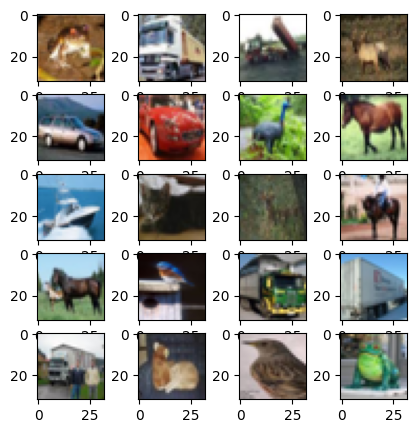

In [5]:
plt.figure(figsize=(5,5))
for i, img in enumerate(x_train[:20]):
    plt.subplot(5,4,i+1)
    plt.imshow(x_train[i])
plt.show()

In [6]:
# keras를 이용해서 하는 방법 one-hot encoding으로 바꿔주세요.
print(f"y_train original shape : {y_train.shape}")
y_train = tf.keras.utils.to_categorical(y_train)
print(f"y_train one-hot shape : {y_train.shape}")
y_test = tf.keras.utils.to_categorical(y_test)

y_train original shape : (50000, 1)
y_train one-hot shape : (50000, 10)


In [7]:
EPOCH = 1000
BATCH_SIZE = 128

es = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

In [8]:
# transfer learning 적용
# pre_trained model 불러오기
base_model = keras.applications.VGG16(
    include_top = False,
    weights="imagenet",
    input_shape=(32,32,3),
    pooling="avg"
)

58889256/58889256 [==============================] - 0s 0us/step


In [9]:
base_model.trainable = False

In [10]:
model = keras.Sequential([
    base_model,
    tf.keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [12]:
model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCH, validation_split=0.2, shuffle=True, callbacks=[es])

Epoch 1/1000
313/313 [==============================] - 11s 23ms/step - loss: 8.1256 - accuracy: 0.3920 - val_loss: 4.2991 - val_accuracy: 0.4756
Epoch 2/1000
313/313 [==============================] - 6s 18ms/step - loss: 3.0401 - accuracy: 0.5169 - val_loss: 2.4777 - val_accuracy: 0.5285
Epoch 3/1000
313/313 [==============================] - 6s 19ms/step - loss: 1.9299 - accuracy: 0.5517 - val_loss: 1.8676 - val_accuracy: 0.5390
Epoch 4/1000
313/313 [==============================] - 6s 19ms/step - loss: 1.5319 - accuracy: 0.5665 - val_loss: 1.5865 - val_accuracy: 0.5388
Epoch 5/1000
313/313 [==============================] - 6s 18ms/step - loss: 1.4127 - accuracy: 0.5699 - val_loss: 1.5118 - val_accuracy: 0.5484
Epoch 6/1000
313/313 [==============================] - 6s 18ms/step - loss: 1.3772 - accuracy: 0.5696 - val_loss: 1.4514 - val_accuracy: 0.5633
Epoch 7/1000
313/313 [==============================] - 6s 19ms/step - loss: 1.3718 - accuracy: 0.5713 - val_loss: 1.5005 - val_a

In [13]:
loss, acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.4245 - accuracy: 0.5647
